<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Processing

In [9]:

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define input image shape and batch size
IMG_HEIGHT, IMG_WIDTH = 500, 500
BATCH_SIZE = 32

# Set up directories
train_dir = '/content/drive/MyDrive/Project2/Data/train'
validation_dir = '/content/drive/MyDrive/Project2/Data/valid'
test_dir = '/content/drive/MyDrive/Project2/Data/test'

# Define augmentation pipeline for training data
train_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Shear-like behavior
    tf.keras.layers.RandomZoom(0.2),  # Zoom augmentation,
    tf.keras.layers.RandomFlip("horizontal_and_vertical")
])

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x, training=True), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x, training=False), y))  # Apply rescaling
```

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x), y))  # Apply rescaling


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-9-ab82aa4c5728>, line 21)

Step 2: Neural Network Architecture Design

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# 1. Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 2. Add a second Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3. Add a third Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 4. Flatten the output
model.add(layers.Flatten())

# 5. Fully Connected (Dense) Layer with Dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))

# 6. Output Layer
model.add(layers.Dense(3, activation='softmax'))  # 3 neurons for 3 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Step 3: Hyperparameter Analysis

In [7]:
from tensorflow.keras import layers, models, optimizers

# Define model with tunable hyperparameters
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=None, input_shape=(500, 500, 3)),  # No activation here
    layers.LeakyReLU(alpha=0.1),  # LeakyReLU activation
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Standard ReLU for comparison
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),  # ELU for dense layer
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Softmax for final layer
])

# Compile with a different optimizer (e.g., RMSprop)
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=20)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5512 - loss: 3.0153 - val_accuracy: 0.4014 - val_loss: 2.7879
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5840 - loss: 0.8039 - val_accuracy: 0.2019 - val_loss: 2.8294
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6200 - loss: 0.7407 - val_accuracy: 0.2019 - val_loss: 2.5565
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6708 - loss: 0.6702 - val_accuracy: 0.4756 - val_loss: 2.5218
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6842 - loss: 0.6626 - val_accuracy: 0.2135 - val_loss: 2.8367
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6978 - loss: 0.6170 - val_accuracy: 0.2042 - val_loss: 3.3257
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7225 - loss: 0.5914 - val_accuracy: 0.4548 - val_loss: 2.8082
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7445 - loss: 0.5498 - val_accuracy: 0.4501 - val_loss:

Step 4: Model Evaluation

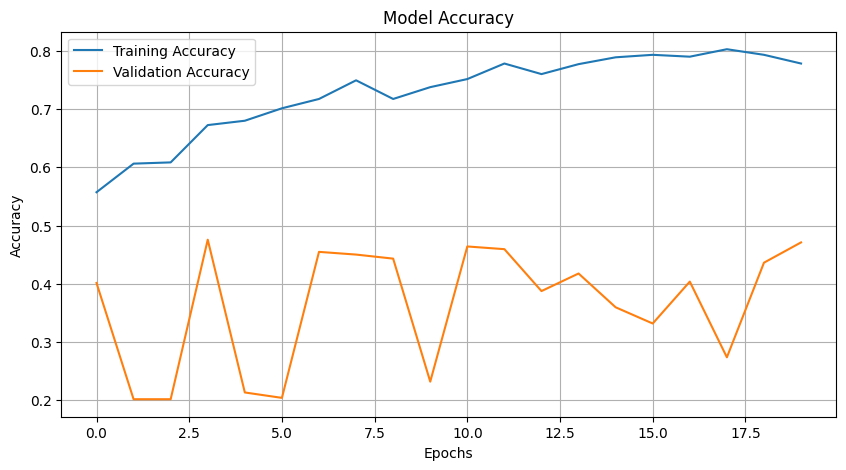

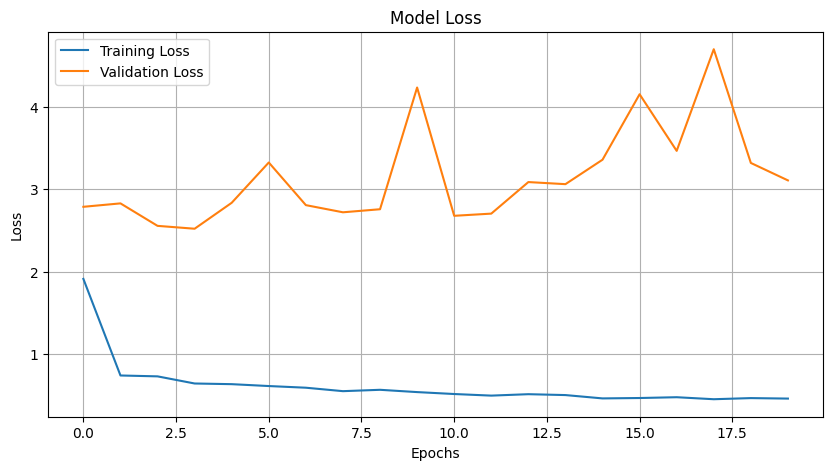

In [8]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
